# **IBEX-35**

## *Librerías*



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from sktime.forecasting.arima import AutoARIMA
from statsmodels.graphics import tsaplots
from sktime.utils.plotting import plot_correlations
from statsmodels.tsa.seasonal import seasonal_decompose
from sktime.transformations.series.boxcox import LogTransformer
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.transformations.series.difference import Differencer
from sktime.utils.plotting import plot_series
from sktime.forecasting.ets import AutoETS
warnings.filterwarnings('ignore')

C:\Users\alexg\anaconda3\lib\site-packages\sktime\utils\validation\series.py:22: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\alexg\anaconda3\lib\site-packages\sktime\forecasting\base\_fh.py:25: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  RELATIVE_TYPES = (pd.Int64Index, pd.RangeIndex, pd.TimedeltaIndex)
C:\Users\alexg\anaconda3\lib\site-packages\sktime\forecasting\base\_fh.py:26: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  ABSOLUTE_TYPES = (pd.Int64Index, pd.RangeIndex, pd.DatetimeIndex, pd.PeriodIndex)
C:\Users\alexg\anaconda3\lib\site-packages\sktime\datatypes\_series\_check.py:43: FutureWarning: pandas.Int64Index is deprecated and w

## *Lectura del CSV y preparación de los datos*
Se procede a leer el archivo CSV de los datos históricos del IBEX35 (^IBEX):

- Fuente: https://es.finance.yahoo.com/quote/%5EIBEX/history?period1=742435200&period2=1651968000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [25]:
df_ibex = pd.read_csv("^IBEX.csv")
df_ibex['Date'] = pd.to_datetime(df_ibex['Date'])
df_ibex = df_ibex.set_index("Date")
df_ibex


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-07-12,2826.800049,2826.800049,2814.600098,2826.399902,2826.396973,0.0
1993-07-13,2826.399902,2843.699951,2820.899902,2843.399902,2843.396973,0.0
1993-07-14,2845.399902,2858.399902,2845.399902,2851.100098,2851.097168,0.0
1993-07-15,2848.699951,2848.699951,2835.000000,2843.699951,2843.697021,0.0
1993-07-16,2843.699951,2848.000000,2818.800049,2830.500000,2830.497070,0.0
...,...,...,...,...,...,...
2022-05-02,8516.599609,8563.200195,8350.000000,8436.000000,8436.000000,158843800.0
2022-05-03,8501.900391,8590.200195,8477.099609,8590.200195,8590.200195,173278100.0
2022-05-04,8594.799805,8612.099609,8498.400391,8500.500000,8500.500000,158306400.0


In [26]:
df_ibex = df_ibex.iloc[4273:,:]
df_ibex

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,11986.500000,12145.099609,11986.099609,12145.099609,12145.086914,184200.0
2010-01-05,12141.799805,12240.500000,12139.799805,12204.400391,12204.387695,238400.0
2010-01-06,12216.400391,12230.700195,12147.599609,12222.500000,12222.487305,123800.0
2010-01-07,12163.000000,12199.700195,12079.099609,12166.299805,12166.287109,192400.0
2010-01-08,12218.000000,12232.200195,12079.900391,12163.000000,12162.987305,213200.0
...,...,...,...,...,...,...
2022-05-02,8516.599609,8563.200195,8350.000000,8436.000000,8436.000000,158843800.0
2022-05-03,8501.900391,8590.200195,8477.099609,8590.200195,8590.200195,173278100.0
2022-05-04,8594.799805,8612.099609,8498.400391,8500.500000,8500.500000,158306400.0


In [27]:
type(df_ibex)

pandas.core.frame.DataFrame

In [28]:
ohlc_dict = {'Open':'first','High':'max','Low':'min','Close': 'last','Volume': 'sum'}
# explicación: https://stackoverflow.com/questions/28126286/convert-daily-pandas-stock-data-to-monthly-data-using-first-trade-day-of-the-mon

In [29]:
df_ibex = df_ibex.resample('M', closed='right', label='right').agg(ohlc_dict)
df_ibex

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-31,11986.500000,12240.500000,10821.200195,10947.700195,4.322800e+06
2010-02-28,10852.400391,11201.599609,9916.599609,10333.599609,5.002200e+06
2010-03-31,10434.700195,11190.000000,10287.599609,10871.299805,4.184200e+06
2010-04-30,10950.400391,11566.099609,10077.900391,10492.200195,4.806800e+06
2010-05-31,10426.200195,10452.200195,8812.099609,9359.400391,7.346800e+06
...,...,...,...,...,...
2022-01-31,8729.700195,8866.599609,8361.400391,8612.799805,3.894739e+09
2022-02-28,8679.900391,8912.200195,8048.000000,8479.200195,5.219313e+09
2022-03-31,8462.099609,8621.000000,7287.700195,8445.099609,6.306474e+09



## *Graficación de la serie temporal y análisis*

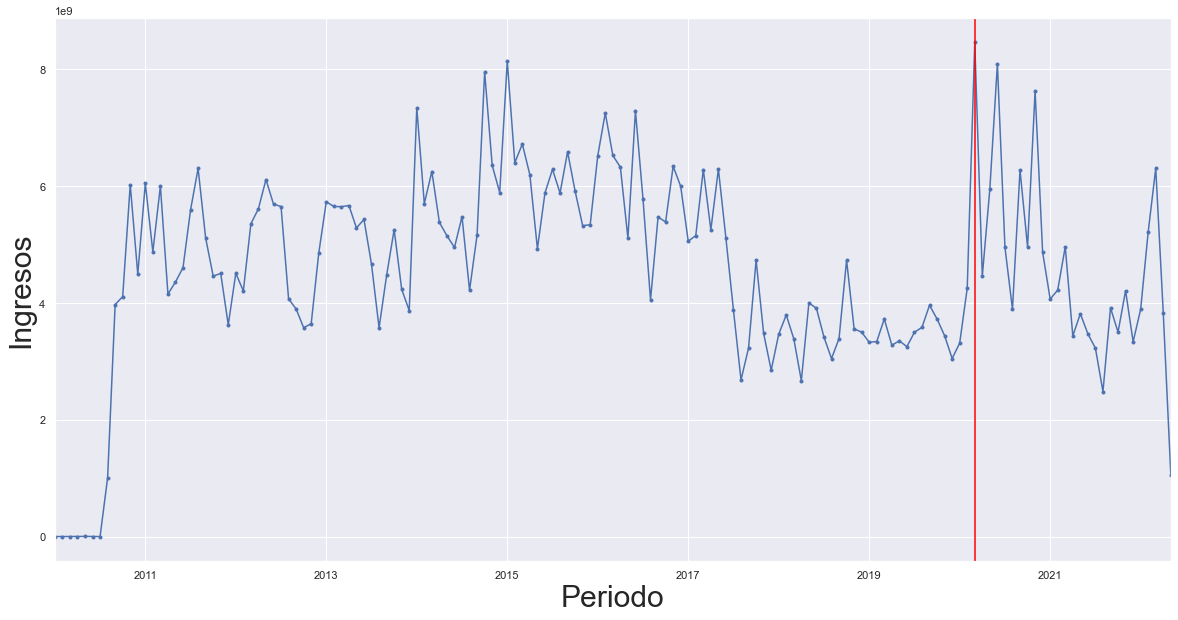

In [30]:
# Ploteamos nuestra serie temporal:
sns.set(rc={'figure.figsize':(20, 10)})
fig = df_ibex['Volume'].plot(marker='.') 
fig.set_ylabel('Ingresos', fontsize = 30)
fig.axvline('2020-03-01', color = 'red', linewidth= 1.5)
fig.set_xlabel('Periodo', fontsize = 30);

In [31]:
def split_and_summarize(dataframe, column, size, fn):
    ranges = []
    values = []
    for i in range(0, len(dataframe), size):
        ranges.append(dataframe[i:i + size])
    for i in ranges:
        values.append(fn(i[column]))
    return(values)

In [32]:
mean = split_and_summarize(df_ibex, 'Volume', 4, np.mean)
variance = split_and_summarize(df_ibex, 'Volume', 4, np.var)

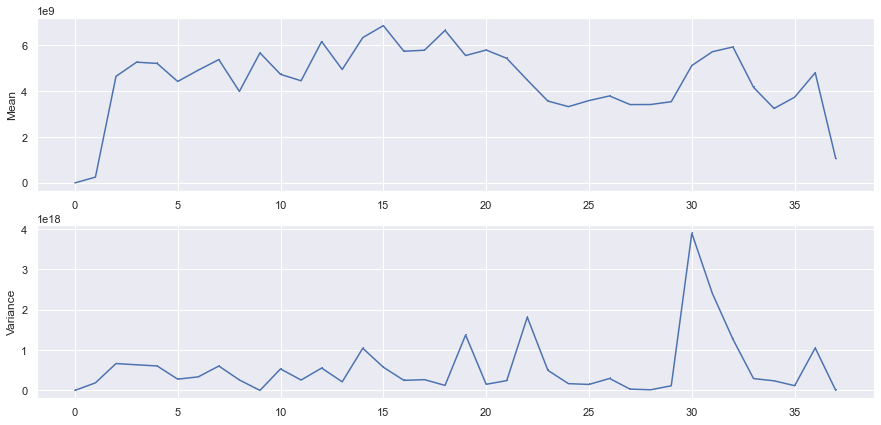

In [33]:
cols = ['mean', 'variance']
df = pd.DataFrame([mean, variance], index=cols)

sns.set(rc={'figure.figsize':(15, 7)})
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(mean, ',-')
ax1.set_ylabel('Mean')

ax2.plot(variance, ',-')
ax2.set_ylabel('Variance')

plt.show()

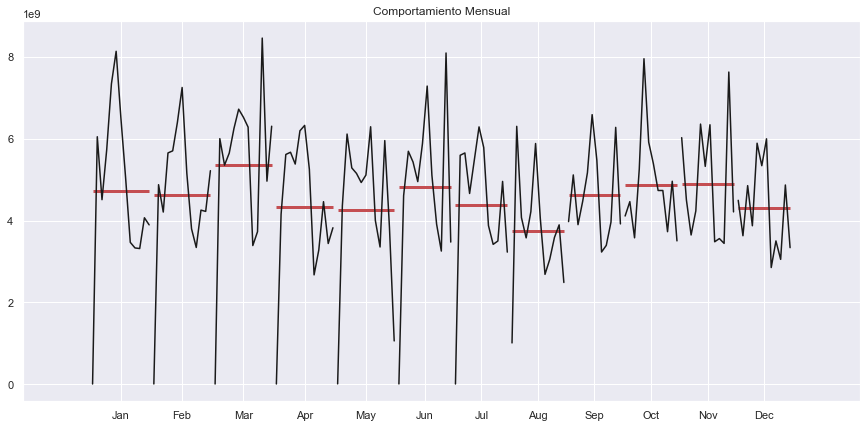

In [34]:
ax = plt.gca()
sm.graphics.tsa.month_plot(df_ibex['Volume'], ax=ax)
ax.set_title('Comportamiento Mensual');

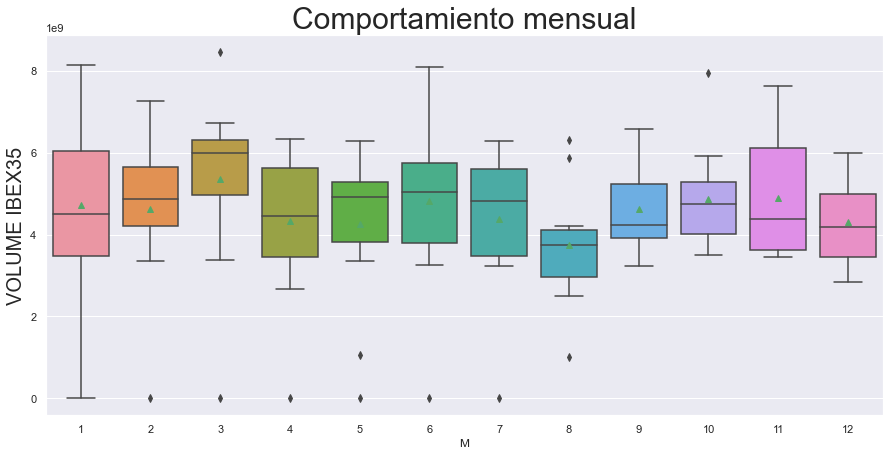

In [35]:
df_ibex['M'] = df_ibex.index.month
sns.boxplot(data = df_ibex, x = 'M', y='Volume', showmeans=True)
ax = plt.gca()
ax.set_ylabel('VOLUME IBEX35', fontsize = 20)
ax.set_title('Comportamiento mensual', fontsize = 30);


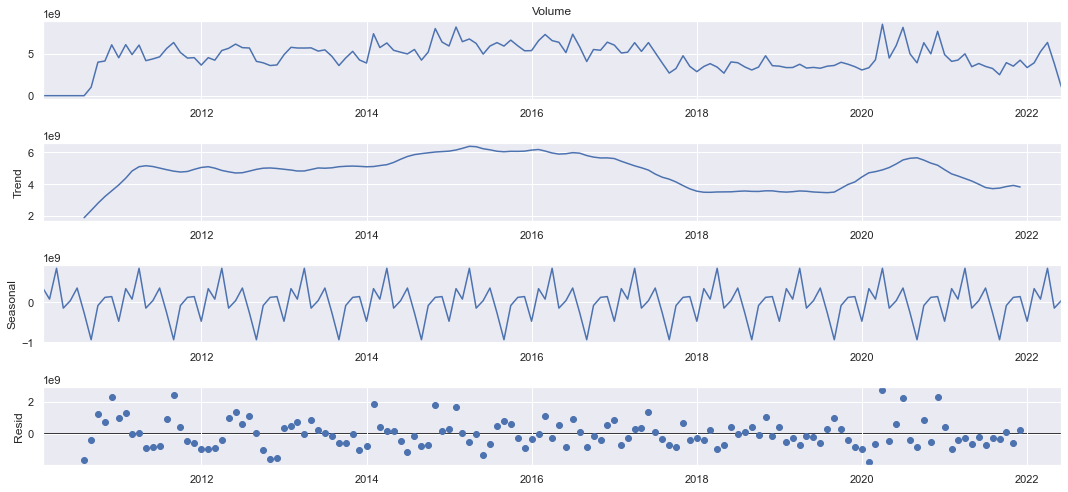

In [36]:
desglose = seasonal_decompose(df_ibex['Volume'], 
                                   model='additive', 
                                   period=12);
desglose.plot();